In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.svm import SVC

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv('UCI_Credit_Card.csv')

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
## drop the id column
## check the number of unique values in each column
## encode the education and marriage column. No need to encode the sex column, the values are already in binary format
## standardize the x values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
{i: len(df[i].unique()) for i in df.columns}

{'ID': 30000,
 'LIMIT_BAL': 81,
 'SEX': 2,
 'EDUCATION': 7,
 'MARRIAGE': 4,
 'AGE': 56,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'default.payment.next.month': 2}

In [10]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [11]:
## The dataset is unbalanced

In [12]:
## function for data encoding

def encode(data, column, prefix):
    data=data.copy()
    dummies=pd.get_dummies(data[column], prefix=prefix)
    data=pd.concat([data, dummies], axis=1)
    data=data.drop(column, axis=1)
    
    return data

In [13]:
## Let us begin the data preprocessing

In [14]:
def preprocessing(data):
    data=data.copy()
    
    ## drop ID column
    data=data.drop('ID', axis=1)
    
    ## encode the education and sex colums
    data=encode(data, 'SEX', prefix='Sex')
    data=encode(data, 'EDUCATION', prefix='Education')
    
    ## x and y values
    x=data.drop('default.payment.next.month', axis=1).copy()
    y=data['default.payment.next.month'].copy()
    
    ## standardize the x values
    
    std=MinMaxScaler()
    x=pd.DataFrame(std.fit_transform(x), columns=x.columns)
    
    return x,y  

In [15]:
x,y = preprocessing(df)

In [16]:
x.head()

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_1,Sex_2,Education_0,Education_1,Education_2,Education_3,Education_4,Education_5,Education_6
0,0.010101,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.111111,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.080808,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.040404,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.040404,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [17]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default.payment.next.month, dtype: int64

In [18]:
## Let us check feature importance

In [19]:
feature=ExtraTreesClassifier()

In [20]:
feature.fit(x,y)

ExtraTreesClassifier()

In [21]:
feature_rank=pd.Series(feature.feature_importances_, index=x.columns)*100

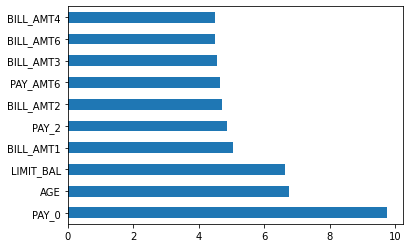

In [22]:
feature_rank.nlargest(10).plot(kind='barh')

plt.show()

In [23]:
## The data is unbalanced so we will use the modeling technique for unbalanced datasets

In [24]:
from imblearn.combine import SMOTETomek
from collections import Counter

In [25]:
sk=SMOTETomek()

In [26]:
xtrain, xtest, ytrain , ytest = train_test_split(x,y, random_state=5)

xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((22500, 30), (7500, 30), (22500,), (7500,))

In [27]:
Counter(ytrain)

Counter({0: 17523, 1: 4977})

In [28]:
x_train, y_train=sk.fit_resample(xtrain, ytrain)

x_test, y_test=sk.fit_resample(xtest, ytest)


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((33762, 30), (33762,), (11280, 30), (11280,))

In [29]:
Counter(y_train)

Counter({0: 16881, 1: 16881})

In [30]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    MLPClassifier(),
    AdaBoostClassifier(),
    DecisionTreeClassifier(),
    XGBRFClassifier(),
    XGBClassifier(),
    RandomForestClassifier()
]

In [31]:
model_names= [
    LogisticRegression,
    KNeighborsClassifier,
    SVC,
    MLPClassifier,
    AdaBoostClassifier,
    DecisionTreeClassifier,
    XGBRFClassifier,
    XGBClassifier,
    RandomForestClassifier
]

In [32]:
for model in models:
    model.fit(x_train,y_train)

C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Daniel\anaconda3\envs\pred\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:36:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
for model, model_name in zip(models, model_names):
    print(model_name, model.score(xtest, ytest)*100)
   

<class 'sklearn.linear_model._logistic.LogisticRegression'> 69.42666666666668
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 67.32000000000001
<class 'sklearn.svm._classes.SVC'> 78.34666666666666
<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 77.97333333333333
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 77.62666666666667
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 70.76
<class 'xgboost.sklearn.XGBRFClassifier'> 80.32000000000001
<class 'xgboost.sklearn.XGBClassifier'> 81.16
<class 'sklearn.ensemble._forest.RandomForestClassifier'> 80.21333333333334
